In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
!pwd
for dirname, _, filenames in os.walk('/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/.DS_Store
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/eff3_new1.h5
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/resnet_800_gen1.h5
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/training_set/.DS_Store
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/training_set/cokes/coke.76.jpg
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/training_set/cokes/coke.62.jpg
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/training_set/cokes/coke.89.jpg
/Users/dongin-jang/Documents/학교 자료/4학년 2학기/종합설계/smartbusket/sojubeer_cnn3/training_set/cokes/

In [2]:
import numpy as np
import pandas as pd
import os

paths = []
dataset_gubuns = []
label_gubuns = []

for dirname, _, filenames in os.walk('/Users/dongin-jang/Desktop/train_data/train_data_1200'):
    for filename in filenames:
        if '.jpg' in filename:
            file_path = dirname+'/'+ filename
            paths.append(file_path)
            if '/new_training_set_1200/' in file_path:
                dataset_gubuns.append('train')  
            elif '/new_test_set_1200/' in file_path:
                dataset_gubuns.append('test')

            if 'beer' in file_path:
                label_gubuns.append('BEER')
            elif 'cocacola' in file_path:
                label_gubuns.append('COCACOLA')
            elif 'cornchip' in file_path:
                label_gubuns.append('CORNCHIP')
            elif 'haribo' in file_path:
                label_gubuns.append('HARIBO')
            elif 'pepsi' in file_path:
                label_gubuns.append('PEPSI')
            elif 'soju' in file_path:
                label_gubuns.append('SOJU')
                
            else: label_gubuns.append('N/A')

In [3]:
paths

['/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_188.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_200.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_189.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_199.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_198.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_196.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_182.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_183.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_197.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_181.jpg',
 '/Users/dongin-jang/Desktop/train_data/train_data_1200/new_

In [4]:
len(paths)

1200

In [5]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print('data_df shape:', data_df.shape)
data_df.head(100)

data_df shape: (1200, 3)


,path,dataset,label
0,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_188.jpg,test,SOJU
1,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_200.jpg,test,SOJU
2,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_189.jpg,test,SOJU
3,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_199.jpg,test,SOJU
4,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/soju/soju_198.jpg,test,SOJU
...,...,...,...
95,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/pepsi/pepsi_198.jpg,test,PEPSI
96,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/pepsi/pepsi_199.jpg,test,PEPSI
97,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/pepsi/pepsi_200.jpg,test,PEPSI
98,/Users/dongin-jang/Desktop/train_data/train_data_1200/new_test_set_1200/pepsi/pepsi_189.jpg,test,PEPSI


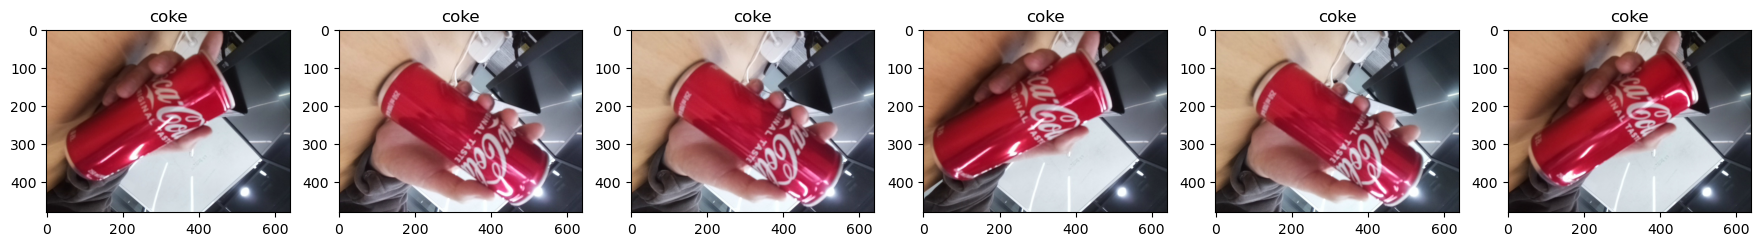

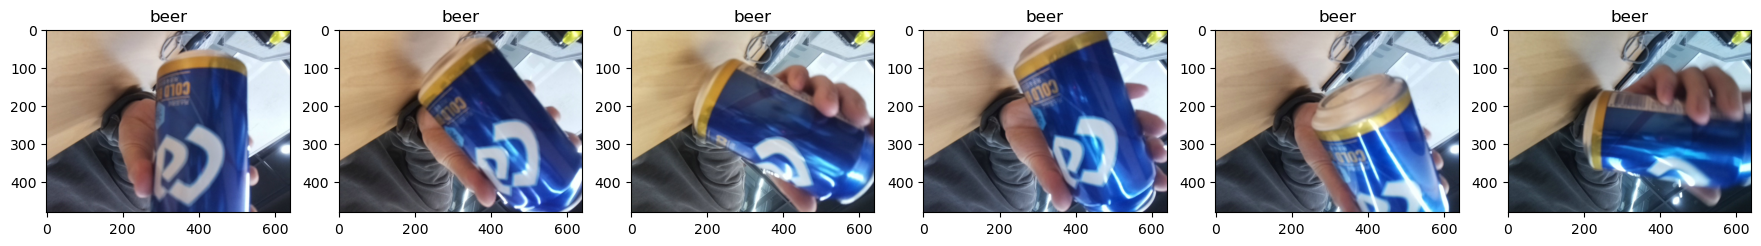

In [6]:
# DOG와 CAT의 이미지 파일 절대 경로를 cv2.imread()로 읽어서 image array로 로드하고 이미지 시각화
# 이미지별로 서로 다른 이미지 사이즈를 가지고 있음. 
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)  
        
coke_image_list = data_df[data_df['label']=='COCACOLA']['path'].iloc[:6].tolist()
show_grid_images(coke_image_list, ncols=6, title='coke')

beer_image_list = data_df[data_df['label']=='BEER']['path'].iloc[:6].tolist()
show_grid_images(beer_image_list, ncols=6, title='beer')


In [7]:
# ImageDataGenerator 객체를 입력하면 augmentation 적용된 일련의 image들을 시각화 해주는 함수 생성. 
def show_aug_image_batch(image, data_generator, n_images=4, to_int=True,title=None):
    
    image_batch = np.expand_dims(image, axis=0)
    # ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)
    
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(6*n_images, 8))

    for i in range(n_images):
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        if(to_int):
            aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)
        axs[i].axis('off')
        axs[i].set_title(title) 


In [8]:
train_df = data_df[data_df['dataset']=='train']
test_df = data_df[data_df['dataset']=='test']
print('train_df shape:', train_df.shape, 'test_df shape:', test_df.shape)

train_df shape: (1080, 3) test_df shape: (120, 3)


In [9]:
from sklearn.model_selection import train_test_split

# scikit learn의 train_test_split()을 이용하여 train용, validation용 DataFrame을 생성
# stratify를 이용하여 label 값을 균등하게 분할 
tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=2021)
print('tr_df shape:', tr_df.shape, 'val_df shape:', val_df.shape)
print('tr_df label distribution:\n', tr_df['label'].value_counts())
print('val_df label distributuion:\n', val_df['label'].value_counts())

tr_df shape: (918, 3) val_df shape: (162, 3)
tr_df label distribution:
 HARIBO      153
SOJU        153
PEPSI       153
COCACOLA    153
CORNCHIP    153
BEER        153
Name: label, dtype: int64
val_df label distributuion:
 HARIBO      27
SOJU        27
PEPSI       27
CORNCHIP    27
COCACOLA    27
BEER        27
Name: label, dtype: int64


In [10]:
# IMAGE 크기와 BATCH 크기를 위한 환경 변수 설정. 
IMAGE_SIZE = 299
BATCH_SIZE = 8

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 학습용과 검증용 ImageDataGenerator 생성. 학습용은 augmentation + rescale적용. 검증용은 rescale만 적용 
# augmentation은 horizontal_flip(좌우 반전)만 적용하고 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용. 
tr_generator = ImageDataGenerator(horizontal_flip=True,
                                  rotation_range=45,
                                  zoom_range=[0.9,1.1],
                                  rescale=1/255.,
                                  vertical_flip=True)

# ImageDataGenerator 객체의 flow_from_dataframe()) 메소드를 호출. 
# flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음. 
# x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
# y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함. 
# y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
# softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 
tr_flow_gen = tr_generator.flow_from_dataframe(dataframe=tr_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
#                                       ,target_size=(300, 300) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='categorical' # 문자열 label을 자동 Encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=True
                                      )

Found 918 validated image filenames belonging to 6 classes.


In [12]:
images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]
print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)
print(images_array[0])
print(labels_array[0])

##### image array shape: (8, 299, 299, 3)
#### label array shape: (8, 6)
[[[0.77478766 0.68067    0.5820751 ]
  [0.77254105 0.6784234  0.58430576]
  [0.7702944  0.6761768  0.5820591 ]
  ...
  [0.7921224  0.7029541  0.33235726]
  [0.78253007 0.6969637  0.32263094]
  [0.7816362  0.6850306  0.3160238 ]]

 [[0.77647066 0.68235296 0.5803922 ]
  [0.77566755 0.6815499  0.5811953 ]
  [0.77342093 0.6793032  0.5834419 ]
  ...
  [0.78274477 0.6980373  0.3239193 ]
  [0.7812067  0.68546003 0.3138765 ]
  [0.78672636 0.6799404  0.34147468]]

 [[0.7758222  0.6836498  0.5810406 ]
  [0.77647066 0.68235296 0.5803922 ]
  [0.77647066 0.68235296 0.5803922 ]
  ...
  [0.7807773  0.6858895  0.31172925]
  [0.7862969  0.68036985 0.33932742]
  [0.79181653 0.6730596  0.356182  ]]

 ...

 [[0.69803923 0.631713   0.57468003]
  [0.69900846 0.6362634  0.5793783 ]
  [0.70176834 0.63902324 0.58765775]
  ...
  [0.47074172 0.48942885 0.5677068 ]
  [0.47523496 0.4669626  0.5407473 ]
  [0.46481475 0.43152806 0.4975774 ]]

 

In [13]:
# 검증용 ImageDataGenerator는 rescale만 적용. 
val_generator = ImageDataGenerator(rescale=1/255.)
val_flow_gen = val_generator.flow_from_dataframe(dataframe=val_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
#                                       ,target_size=(300, 300) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='categorical' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )

Found 162 validated image filenames belonging to 6 classes.


In [14]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
import tensorflow as tf

def create_model(model_name='resnet50', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_name == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_name == 'efficientnetb3':
        base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_name == 'efficientnetb4':
        base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights='imagenet', input_tensor=input_tensor)

    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)

    x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc2')(x)

    output = Dense(6, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [16]:
model = create_model(model_name='xception')

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

N_EPOCHS = 20

model.fit(tr_flow_gen, epochs=N_EPOCHS,
          steps_per_epoch=int(np.ceil(tr_df.shape[0]/BATCH_SIZE)),
          validation_data=val_flow_gen, 
          validation_steps=int(np.ceil(val_df.shape[0]/BATCH_SIZE)), 
          callbacks=[rlr_cb, ely_cb])

Epoch 1/20


2022-11-30 13:21:17.048697: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-30 13:21:18.346210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


115/115 [==============================] - ETA: 0s - loss: 0.9688 - accuracy: 0.6852

2022-11-30 13:22:10.927745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


115/115 [==============================] - 56s 471ms/step - loss: 0.9688 - accuracy: 0.6852 - val_loss: 51.8745 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/20
115/115 [==============================] - 53s 463ms/step - loss: 0.7015 - accuracy: 0.8203 - val_loss: 20.2015 - val_accuracy: 0.1790 - lr: 0.0010
Epoch 3/20
115/115 [==============================] - 54s 467ms/step - loss: 0.4997 - accuracy: 0.8704 - val_loss: 3.3441 - val_accuracy: 0.4691 - lr: 0.0010
Epoch 4/20
115/115 [==============================] - 53s 463ms/step - loss: 0.4228 - accuracy: 0.8813 - val_loss: 1.0153 - val_accuracy: 0.6790 - lr: 0.0010
Epoch 5/20
115/115 [==============================] - 53s 464ms/step - loss: 0.2491 - accuracy: 0.9281 - val_loss: 0.2665 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 6/20
115/115 [==============================] - 54s 469ms/step - loss: 0.2664 - accuracy: 0.9281 - val_loss: 2.1490 - val_accuracy: 0.6605 - lr: 0.0010
Epoch 7/20
115/115 [==============================] - 53s 462

In [206]:
test_generator = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE)
                                      ,class_mode='categorical'
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )

model.evaluate(test_flow_gen)

Found 120 validated image filenames belonging to 6 classes.
15/15 [==============================] - 2s 115ms/step - loss: 0.0967 - accuracy: 0.9833


[0.09669523686170578, 0.98333340883255]

In [208]:
model.save('/Users/dongin-jang/Desktop/model/xception_1200.h5')